In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles
import matplotlib.colors as colors
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

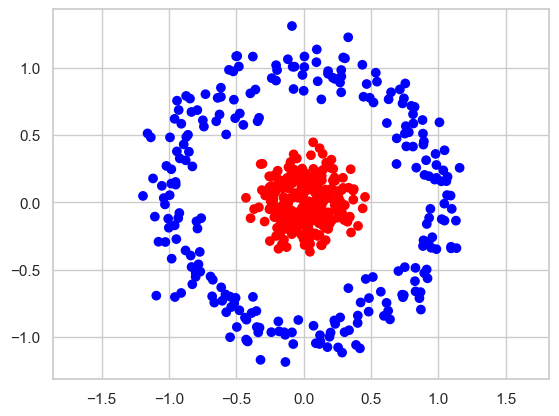

In [6]:
# Generate and visualize the dataset
X, y = make_circles(n_samples=500, noise=0.1, random_state=42, factor=0.2)
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors.ListedColormap(["blue", "red"]))
plt.axis('equal')
plt.show()

In [7]:
class Adaboost:
    def __init__(self, model, n_clf=50):
        self.n_clf = n_clf  # Number of weak classifiers
        self.model = model  # The weak learner model, e.g., Decision Tree Stumps
        self.alphas = []  # To store the alpha values
        self.models = []  # To store the weak learners

    def fit(self, X, y):
        n_samples, _ = X.shape
        # Initialize sample weights (uniform)
        w = np.full(n_samples, 1 / n_samples)
        
        for _ in range(self.n_clf):
            clf = self.model  # Create a new weak learner
            # Train the weak learner on weighted data
            clf.fit(X, y, sample_weight=w)
            y_pred = clf.predict(X)
            
            # Calculate the weighted error (epsilon)
            error = np.sum(w * (y_pred != y)) / np.sum(w)

            # Compute alpha (the weight of the weak learner)
            alpha = 0.5 * np.log((1 - error) / (error + 1e-10))  # Add small value to avoid division by zero
            
            # Update sample weights
            w *= np.exp(-alpha * y * y_pred)
            
            # Renormalize weights
            w /= np.sum(w)

            # Save the weak learner and its alpha
            self.models.append(clf)
            self.alphas.append(alpha)

    def predict(self, X):
        # Initialize predictions as zero
        final_pred = np.zeros(X.shape[0])

        # For each weak learner, predict and add weighted prediction
        for alpha, clf in zip(self.alphas, self.models):
            final_pred += alpha * clf.predict(X)
        
        # Return the sign of the aggregated predictions (final classification)
        return np.sign(final_pred)


In [21]:
ada = Adaboost(DecisionTreeClassifier(max_depth=1), n_clf=5)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          -1       0.96      0.41      0.57        61
           1       0.64      0.98      0.77        64

    accuracy                           0.70       125
   macro avg       0.80      0.70      0.67       125
weighted avg       0.80      0.70      0.68       125

